# Piecewise-linear fit

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE787: Machine learning, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

--2019-11-05 16:16:02--  https://jonghank.github.io/ee370/files/fit_data.csv
Resolving jonghank.github.io (jonghank.github.io)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to jonghank.github.io (jonghank.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 

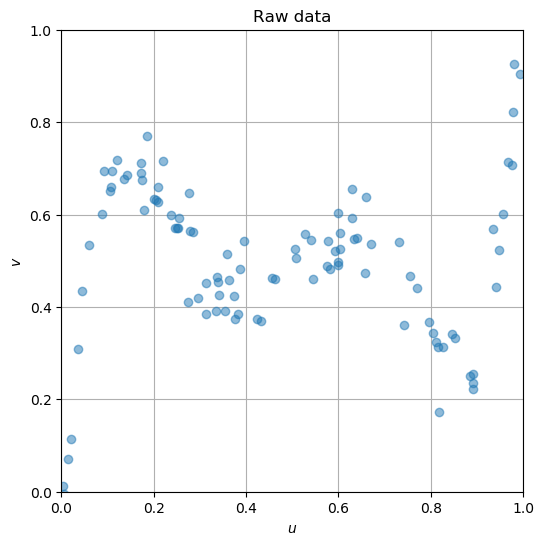

200 OK
Length: 5001 (4.9K) [text/csv]
Saving to: ‘/tmp/juliablEV93’

     0K ....                                                  100% 19.9M=0s

2019-11-05 16:16:03 (19.9 MB/s) - ‘/tmp/juliablEV93’ saved [5001/5001]



In [1]:
using PyPlot
using CSV
using Convex, ECOS

########## load data

data = CSV.read(download("https://jonghank.github.io/ee370/files/fit_data.csv"))

u = data[:,1]
v = data[:,2]

figure(figsize=(6,6), dpi=100)
plot(u, v, "o", alpha=0.5)
grid()
axis("square")
xlim(0, 1)
ylim(0, 1)
xlabel(L"u")
ylabel(L"v")
title("Raw data")
show()

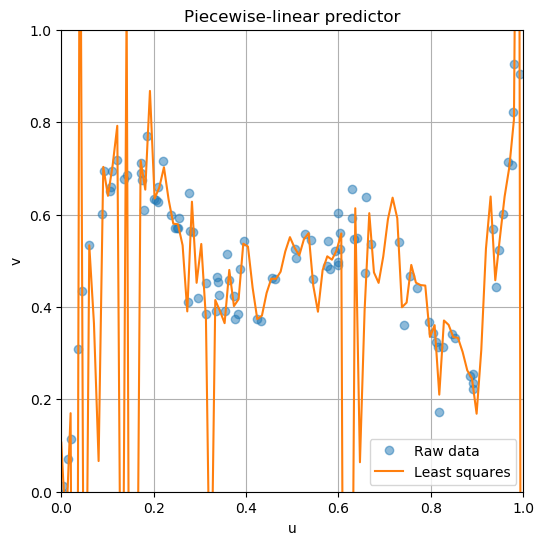

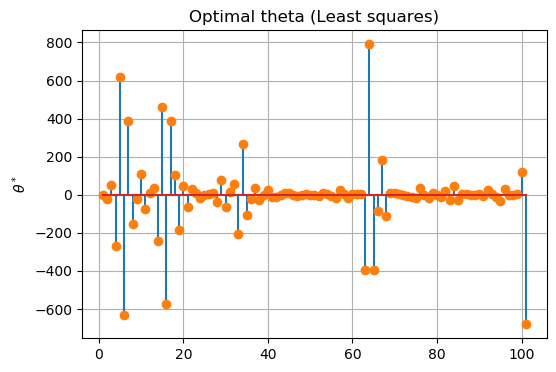

In [2]:
# piecewise-linear fit
# constant, linear, ReLU features with kinks ranging from 0 to 1, equally spaced by dx

dx = 0.01
n = length(u)

X = ones(n,1)
X = [X u]
for i in dx:dx:(1-dx)
    X = [X maximum([zeros(n) u.-i], dims=2)]
end
d = size(X,2)

y = v

theta_opt = X \ y

vp = range(0, stop=1, length=100)

X_vp = ones(length(vp),1)
X_vp = [X_vp vp]
for i in dx:dx:(1-dx)
    X_vp = [X_vp maximum([zeros(length(vp)) vp.-i], dims=2)]
end

figure(figsize=(6,6), dpi=100)
plot(u, v, "o", alpha=0.5, label="Raw data")
plot(vp, X_vp*theta_opt, label="Least squares")
grid()
axis("square")
xlim(0, 1)
ylim(0, 1)
xlabel("u")
ylabel("v")
title("Piecewise-linear predictor")
legend()
show()

figure(figsize=(6,4), dpi=100);
stem(1:d, theta_opt, markerfmt="C1o");
ylabel(L"$\theta^*$");
title("Optimal theta (Least squares)");
grid()
show()

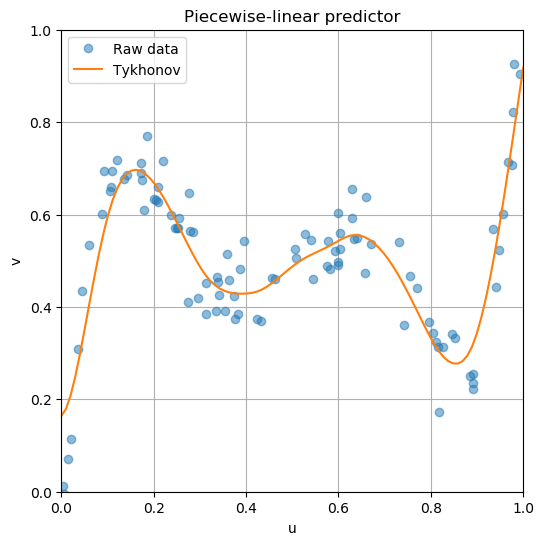

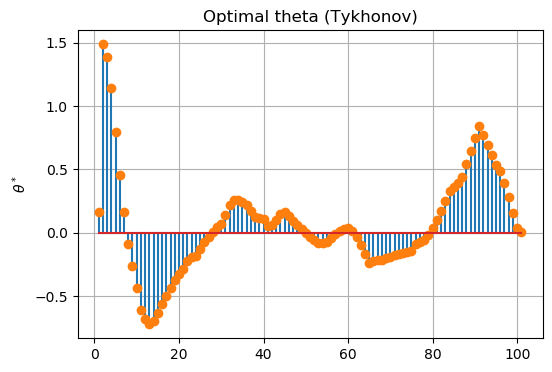

In [3]:
# piecewise-linear fit, tykhonov

theta_cvx = Variable(size(X,2));

loss = norm(X*theta_cvx-y, 2);
regl = 0.1*norm(theta_cvx[2:end], 2);
problem = minimize(loss+regl);
solve!(problem, ECOSSolver(verbose=false));
theta_tyc = evaluate(theta_cvx);

vp = range(0, stop=1, length=100)

X_vp = ones(length(vp),1)
X_vp = [X_vp vp]
for i in dx:dx:(1-dx)
    X_vp = [X_vp maximum([zeros(length(vp)) vp.-i], dims=2)]
end

figure(figsize=(6,6), dpi=100)
plot(u, v, "o", alpha=0.5, label="Raw data")
plot(vp, X_vp*theta_tyc, label="Tykhonov")
grid()
axis("square")
xlim(0, 1)
ylim(0, 1)
xlabel("u")
ylabel("v")
title("Piecewise-linear predictor")
legend()
show()

figure(figsize=(6,4), dpi=100);
stem(1:d, theta_tyc, markerfmt="C1o");
ylabel(L"$\theta^*$");
title("Optimal theta (Tykhonov)");
grid()
show()

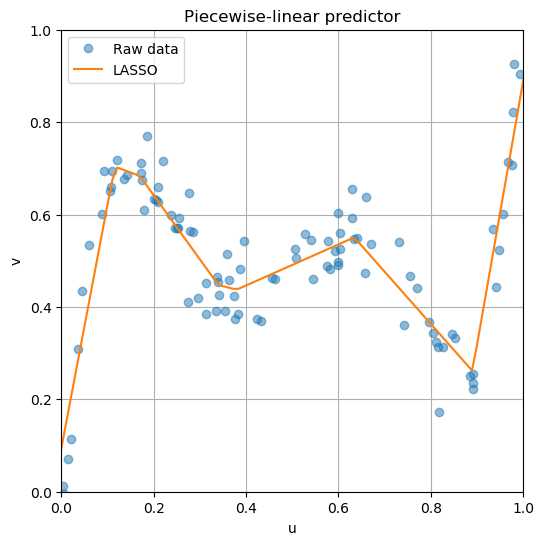

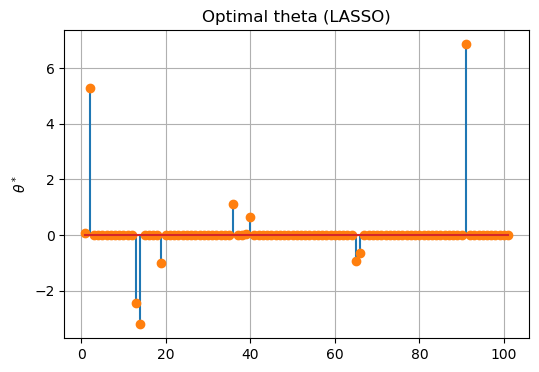

In [4]:
# piecewise-linear fit, lasso

theta_cvx = Variable(d);

loss = norm(X*theta_cvx-y, 2);
regl = 0.02*norm(theta_cvx[2:end], 1);
problem = minimize(loss+regl);
solve!(problem, ECOSSolver(verbose=false));
theta_las = evaluate(theta_cvx);

vp = range(0, stop=1, length=100)

X_vp = ones(length(vp),1)
X_vp = [X_vp vp]
for i in dx:dx:(1-dx)
    X_vp = [X_vp maximum([zeros(length(vp)) vp.-i], dims=2)]
end

figure(figsize=(6,6), dpi=100)
plot(u, v, "o", alpha=0.5, label="Raw data")
plot(vp, X_vp*theta_las, label="LASSO")
grid()
axis("square")
xlim(0, 1)
ylim(0, 1)
xlabel("u")
ylabel("v")
title("Piecewise-linear predictor")
legend()
show()

figure(figsize=(6,4), dpi=100);
stem(1:d, theta_las, markerfmt="C1o");
ylabel(L"$\theta^*$");
title("Optimal theta (LASSO)");
grid()
show()